<a href="https://colab.research.google.com/github/nikhilkalghatgi/learning/blob/main/Transistor_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transistor count doubles every 2 years, ie its an exponential curve. We need to predict the count 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-04-07 16:45:13--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-04-07 16:45:13 (52.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [6]:
X = data[:,0].reshape(-1,1)          # X is 1D array but ML algo expects NxD array, so this just puts each element as an 1x1 array

In [8]:
X

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

In [9]:
Y = data[:,1]        # Y is target so no need to reshape

In [10]:
Y = np.log(Y)   # cuz Y increases exponentially in this case, taking log will make it linear

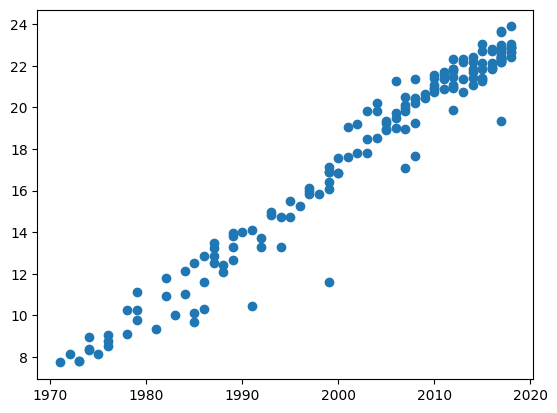

In [11]:
plt.scatter(X,Y)

In [12]:
X = X - X.mean()

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),   # cuz D = 1, ie 1 feature in each sample
    tf.keras.layers.Dense(1)              # output shape is 1 cuz we have 1 o/p ie the predicted value
])

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),    # TODO: wth is this? he said if we have scaled data then adam could be used
    loss='mse',
)

In [16]:
def schedule(epoch, lr):    # adam optimizer does this automatically but since we use SGD we need to do this
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [18]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])  # epoch value is got by trail and error

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 546.5969 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 533.6687 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 358.2908 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 404.7419 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 393.0276 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 307.9353 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 303.2440 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 160.6785 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 190.8110 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 74.4076 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss

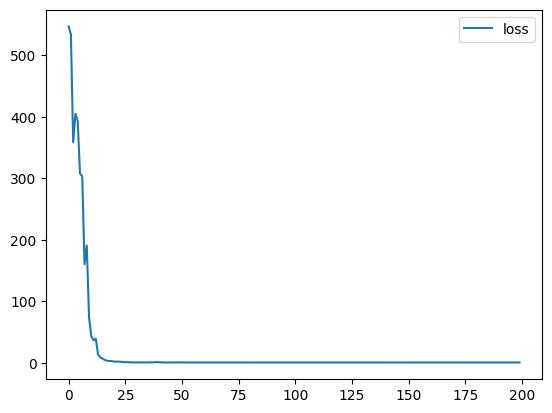

In [19]:
plt.plot(r.history['loss'], label='loss')     # to check which epoch value to choose, 
plt.legend()                                  # here even 75 would have been fine

In [24]:
# understanding the model and weights
model.layers

In [25]:
len(model.layers)

1

In [26]:
model.layers[0].get_weights()

[array([[0.34795034]], dtype=float32), array([17.778923], dtype=float32)]

In [27]:
a = model.layers[0].get_weights()[0][0,0]     # since only 1 layer and 1 size, a is slope of the equation y=ax+b